In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [161]:
class Regression(object):
    """
    Base regression model that creates a relationship between x and y variables
    
    parameters:
    -----------------
    n_iter = number of iterations over which the weights of the model would be tuned
    learning_rate = rate by which by weights are adjusted in each iteration
    """
    
    def __init__(self, n_iter, learning_rate):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        
    def init_weights(self, n_features):
        limit = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit,(n_features,))
        
    def fit(self, X, Y):
        #Adding a bias weght column
        X = np.insert(X,0,1,axis=1)
        #for every iteration lets track error
        self.training_errors = []
        #initialize the weight vector
        self.init_weights(X.shape[1])
        
        #performning gradient descent
        
        for i in range(self.n_iter):
            #prediction
            y_pred = X.dot(self.w)
            
            #compute l1 loss
            me =  np.mean(0.5 *(Y-y_pred)**2)
            
            self.training_errors.append(me)
            
            #Gradient of loss w.r.t weights
            self.grad_w = (1/X.shape[0]) * X.T.dot(y_pred - Y)

            #update the weight
            self.w = self.w - self.learning_rate * self.grad_w
        
    def predict(self,X):
      X = np.insert(X,0,1,axis=1)
      y_pred = X.dot(self.w)
      return y_pred
    

<Axes: >

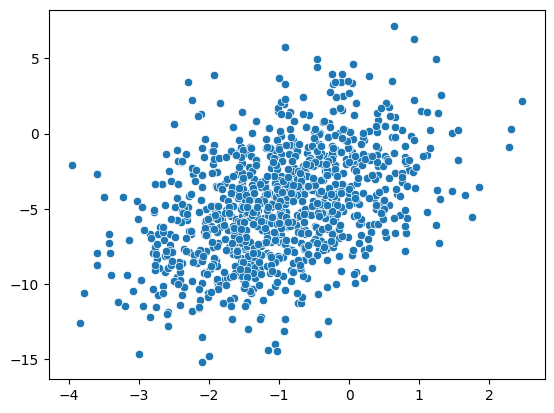

In [83]:
#simulating random data for the regression
X1 = np.random.normal(-1,1,1000)
X2 = np.random.normal(-1.5,1.5,1000)
X = np.stack([X1,X2],axis=1)
Y =   2 + 1.5 * X1 + 1.8 * X2 +  np.random.normal(-2.75,1.75,1000)
sns.scatterplot(x=X1,y=Y)

In [168]:
reg = Regression(100,0.01)
reg.fit(X,Y)

Text(0.5, 1.0, 'training error')

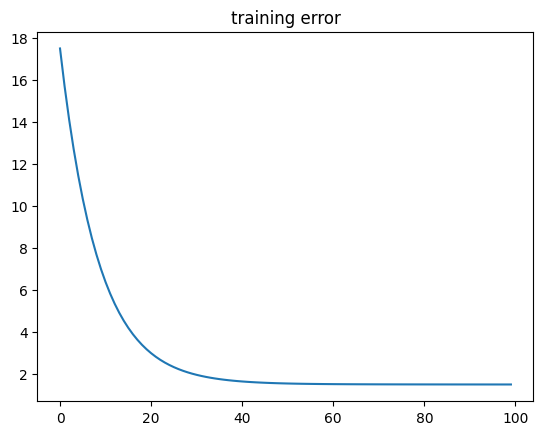

In [170]:
sns.lineplot(x = range(len(reg.training_errors)),y = reg.training_errors)
plt.title('training error')